In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8d5476f97996479eb3ccf78dd2f59c3b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0j6hBQs_mCKTdJdQzk7NAtYOqEs5FTDMYxIe8bibJfL2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8d5476f97996479eb3ccf78dd2f59c3b.get_object(Bucket='myproject-donotdelete-pr-gxh1qz81jnte6e',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [39]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [40]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [41]:
df.dropna(axis = 0, inplace = True)

In [42]:
y = df.iloc[:,3]

In [43]:
df.count()

Country                            1649
Year                               1649
Status                             1649
Life expectancy                    1649
Adult Mortality                    1649
infant deaths                      1649
Alcohol                            1649
percentage expenditure             1649
Hepatitis B                        1649
Measles                            1649
 BMI                               1649
under-five deaths                  1649
Polio                              1649
Total expenditure                  1649
Diphtheria                         1649
 HIV/AIDS                          1649
GDP                                1649
Population                         1649
 thinness  1-19 years              1649
 thinness 5-9 years                1649
Income composition of resources    1649
Schooling                          1649
dtype: int64

In [44]:
X = df.drop(df.columns[[3]],axis = 1)

In [45]:
df['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
X['Status'] = le.fit_transform(X['Status'])

In [48]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


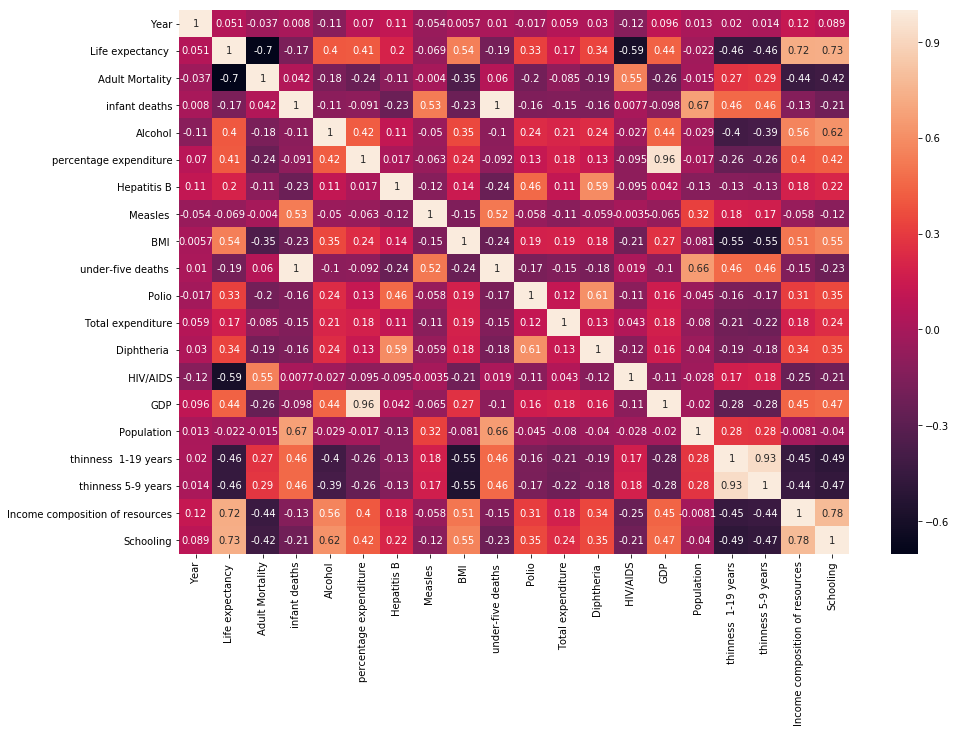

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [50]:
X.drop(X.columns[[0]], axis = 1, inplace = True)

In [51]:
X.dropna(axis = 0, inplace = True)

In [52]:
X.shape

(1649, 20)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [54]:
X_test.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1210,2007,1,19.0,154,0.06,102.633435,76.0,19456,2.5,188,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
2273,2007,1,132.0,1,9.30,772.870035,99.0,201,55.1,1,93.0,1.20,94.0,0.1,5458.121718,7381579.0,2.4,2.4,0.743,13.5
1005,2004,0,86.0,3,11.83,5842.374765,88.0,121,57.1,3,96.0,1.37,96.0,0.1,34165.934300,8251626.0,1.1,1.1,0.877,16.4
2926,2011,1,464.0,28,6.00,63.750530,94.0,0,29.9,42,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
518,2009,1,453.0,17,1.56,40.451569,42.0,11,19.8,25,45.0,3.58,42.0,7.3,449.961839,44423.0,9.1,9.1,0.345,6.4


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
lr = LinearRegression(normalize = True, fit_intercept = True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse(y_test, y_pred)

13.014944111868438

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8167489604602882

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, verbose = 1)
rf.fit(X_train,y_train)
#rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [58]:
rf_pred = rf.predict(X_test)

In [59]:
mse(y_test,rf_pred)

3.523318993939402

In [60]:
r2_score(y_test,rf_pred)

0.9503914989784219

In [61]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [62]:
wml_credentials = {
  "apikey": "6dVhZmcCFfYRf96DaGd4gisG07vi4KKgVxtmQhE2JzrV",
  "iam_apikey_description": "Auto-generated for key 1ece8e8d-a843-47b4-bc8d-2e305359afb7",
  "iam_apikey_name": "Service credentials-2",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/80290ebbcc2c4ac997d320122688fcf8::serviceid:ServiceId-333dee6c-3fb1-4dc6-ade5-bc2adff058fe",
  "instance_id": "decb2d71-271e-45bb-b043-418ef35639c5",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [63]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [64]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Kshitij',
    client.repository.ModelMetaNames.AUTHOR_EMAIL : 'imh10056.16@bitmesra.ac.in',
    client.repository.ModelMetaNames.NAME : 'Life expectancy'
}

In [65]:
model_artifact = client.repository.store_model(rf,meta_props = model_props)

In [66]:
model_artifact

{'metadata': {'guid': '46166524-89d0-4081-b199-9c5282f73e53',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/decb2d71-271e-45bb-b043-418ef35639c5/published_models/46166524-89d0-4081-b199-9c5282f73e53',
  'created_at': '2020-06-10T07:33:24.624Z',
  'modified_at': '2020-06-10T07:33:24.687Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/decb2d71-271e-45bb-b043-418ef35639c5/published_models/46166524-89d0-4081-b199-9c5282f73e53/learning_configuration',
  'author': {'name': 'Kshitij'},
  'name': 'Life expectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/decb2d71-271e-45bb-b043-418ef35639c5/published_models/46166524-89d0-4081-b199-9c5282f73e53/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/decb2d71-271e-45bb-b043-418ef35639c5/published_models/46166524-89d0-4081-b199-9c5282f73e53/feedback',
  'latest_version': {'url': '

In [67]:
guid = client.repository.get_model_uid(model_artifact)

In [68]:
guid

'46166524-89d0-4081-b199-9c5282f73e53'

In [69]:
deploy = client.deployments.create(guid, name = 'Life expectancy prediction')



#######################################################################################

Synchronous deployment creation for uid: '46166524-89d0-4081-b199-9c5282f73e53' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='82083f27-9eea-40f6-8091-490f45aa5500'
------------------------------------------------------------------------------------------------




In [70]:
scoring_url = client.deployments.get_scoring_url(deploy)

In [71]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/decb2d71-271e-45bb-b043-418ef35639c5/deployments/82083f27-9eea-40f6-8091-490f45aa5500/online'

In [72]:
client.deployments.list()

------------------------------------  --------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                        TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
82083f27-9eea-40f6-8091-490f45aa5500  Life expectancy prediction  online  DEPLOY_SUCCESS  2020-06-10T07:33:32.982Z  scikit-learn-0.20  model
d90616e2-129a-40b3-9726-1451472e10c5  Life expectancy prediction  online  DEPLOY_SUCCESS  2020-06-10T06:18:56.467Z  scikit-learn-0.20  model
e9c609cb-63f7-40c3-92d8-ab8d5067921a  Life expectancy prediction  online  DEPLOY_SUCCESS  2020-06-09T15:52:36.280Z  scikit-learn-0.20  model
edb6ff36-5841-4264-8c36-0c6745bce455  Life expectancy prediction  online  DEPLOY_SUCCESS  2020-06-09T11:31:53.476Z  scikit-learn-0.20  model
14d62a9e-922f-4dd2-98cc-e3c0556d1423  Salary Prediction           online  DEPLOY_SUCCESS  2020-06-08T06:39:25.894Z  scikit-learn-0.20  mod